# Linear Regression

Regression: Least square error

Classification: 0-1 loss function

In [3]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
n = 100
beta_0 = 5
beta_1 = 2

np.random.seed(1)

x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

Text(0, 0.5, 'y')

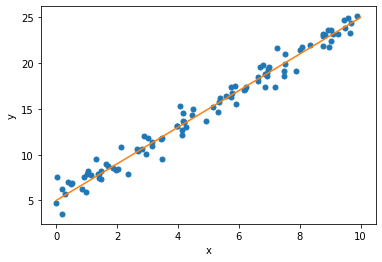

In [5]:
plt.figure()
plt.plot(x, y, "o", ms=5)
xx = np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx)
plt.xlabel("x")
plt.ylabel("y")

In [6]:
np.mean(x)

4.8587792760014565

In [7]:
np.mean(y)

14.80142786070299

$$c_i = y_i - \hat{y}_i$$

$$RSS = c^{2}_{1} + c^{2}_{2} + ... + e^{2}_{n}$$

In [8]:
def compute_rss(y_estimate, y):
    return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
    return b_0 + b_1 * x
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)

In [9]:
rss

81.540007425512

In [15]:
rss = []
#slopes = np.arange(-10, 15, 0.01)
slopes = np.arange(-10, 15, 0.001)

for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x)**2))

In [16]:
ind_min = np.argmin(rss)
print("Estimate for the slope: ", slopes[ind_min])

Estimate for the slope:  2.003999999993347


Text(0, 0.5, 'RSS')

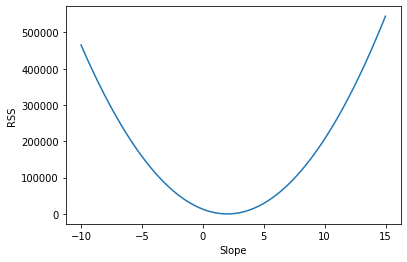

In [14]:
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS")

In [17]:
import statsmodels.api as sm
mod = sm.OLS(y, x)
est = mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Fri, 20 Mar 2020   Prob (F-statistic):                    1.14e-75
Time:                        19:19:19   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
X = sm.add_constant(x)
mod = sm.OLS(y, X)
est = mod.fit()

In [19]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           7.47e-82
Time:                        19:21:43   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.000       4.891       5.583
x1             1.9685      0.031     64.151      0.000       1.908       2.029
==============================================================================
Omnibus:                        2.308   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.753
Skew:                          -0.189   Prob(JB):                        0.416
Kurtosis:                       3.528   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
n = 500
beta_0 = 5
beta_1 = 2
beta_2 = -1
np.random.seed(1)

x_1 = 10 * ss.uniform.rvs(size=n)
x_2 = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1*x_1 + beta_2*x_2 + ss.norm.rvs(loc=0, scale=1, size=n)

In [24]:
X = np.stack([x_1, x_2], axis=1) # 1: column, 0: row

Text(0.5, 0, '$y$')

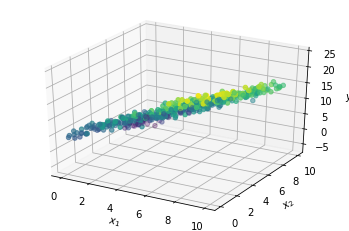

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$")

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lm.intercept_

5.154077763777254

In [28]:
lm.coef_[0]

1.9999378989891399

In [29]:
lm.coef_[1]

-1.020264486993336

In [31]:
X_0.shape

(2,)

In [33]:
X_0 = np.array([2, 4])
lm.predict(X_0.reshape(1,-1))

array([5.07289561])

R_square is close to 1 --> good and whereas

In [35]:
lm.score(X, y) 

0.9798997316600129

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

lm_new = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
lm.score(X_test, y_test) # Evaluate

0.9794930834681773

# Logistic Regression

In [55]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [65]:
def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)
    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    return (x1, y1, x2, y2)

def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1, y1, "o", ms=2)
    plt.plot(x2, y2, "o", ms=2)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

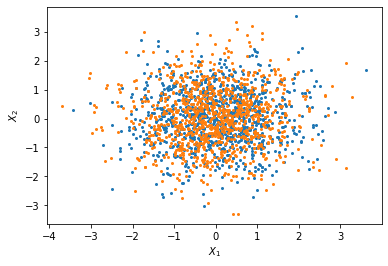

In [66]:
(x1, y1, x2, y2) = gen_data(1000, 0, 1, 1)
plot_data(x1, y1, x2, y2)

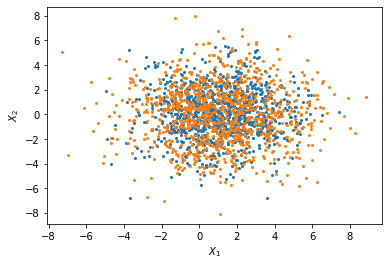

In [67]:
(x1, y1, x2, y2) = gen_data(1000, 1, 2, 2.5)
plot_data(x1, y1, x2, y2)

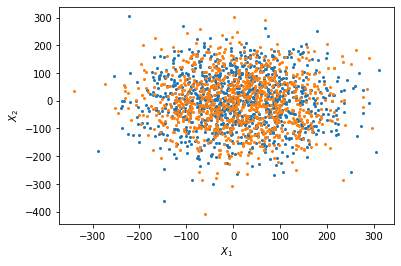

In [68]:
(x1, y1, x2, y2) = gen_data(1000, 10, 100, 100)
plot_data(x1, y1, x2, y2)

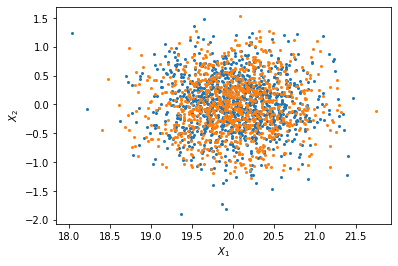

In [69]:
(x1, y1, x2, y2) = gen_data(1000, 20, 0.5, 0.5)
plot_data(x1, y1, x2, y2)

In [70]:
def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

In [72]:
prob_to_odds(0.8)

4.000000000000001

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
clf = LogisticRegression()

In [78]:
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))

In [79]:
X.shape

(2000, 2)

In [82]:
n = 1000
y = np.hstack((np.repeat(1, n), np.repeat(2, n)))

In [83]:
y.shape

(2000,)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

In [85]:
y_train.shape

(1000,)

In [89]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
clf.score(X_test, y_test)

0.48

In [92]:
clf.predict_proba(np.array([-2, 0]).reshape(1, -1))

array([[0.90471306, 0.09528694]])

In [93]:
clf.predict(np.array([-2, 0]).reshape(1, -1))

array([1])

In [95]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

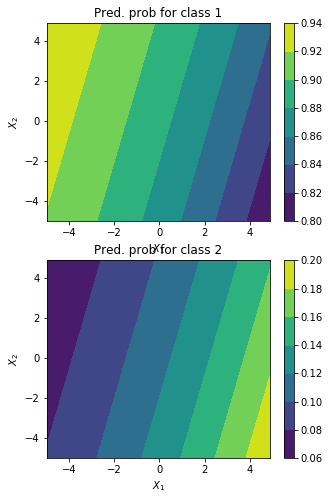

In [102]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");